## flwの一部を使用して、opencvで顔認識を行う「自分自身」もモデルを作成する。

1.  学習データを作成する
2.  モデルを学習する　　creatstemples  -> haartrainig -> カスケードファイルが作成される
3.  モデル使って評価する

## 学習データの作成方法

学習データのフォーマット

 画像ファイル名（相対パス） 学習させたいオブジェクトの個数　 x1 y1 w1 h1　x2 y2 w2 h2
 例　：　./xxxx/yyyy/img.jpg  2　12 34 56 78 90 10 11 12

 1. opencvのカスケードファイルを自分で作成してみる。(最も基本的な機械学習を体験してみる)
 2. カスケードファイルを作成するには、学習データが必要。学習データのフォーマットは⇧を参照。
 3. 今回は、tain_dataディレクトリ内ある画像を使用する。
 4. 作成した学習データで 
    a) opencv_createsamples  :  追加の学習データ作成
    b) a)で作成したファイルを使用してopencv_traincascadeで学習を行い、カスケードファイルを作成する。
    
 
 ツール名

```shell
 opencv_createsamples.exe
 opencv_traincascade.exe

./opencv_createsamples
Usage: ./opencv_createsamples
  [-info <collection_file_name>]
  [-img <image_file_name>]
  [-vec <vec_file_name>]
  [-bg <background_file_name>]
  [-num <number_of_samples = 1000>]
  [-bgcolor <background_color = 0>]
  [-inv] [-randinv] [-bgthresh <background_color_threshold = 80>]
  [-maxidev <max_intensity_deviation = 40>]
  [-maxxangle <max_x_rotation_angle = 1.100000>]
  [-maxyangle <max_y_rotation_angle = 1.100000>]
  [-maxzangle <max_z_rotation_angle = 0.500000>]
  [-show [<scale = 4.000000>]]
  [-w <sample_width = 24>]
  [-h <sample_height = 24>]
  [-maxscale <max sample scale = -1.000000>]
  [-rngseed <rng seed = 12345>]

  ./opencv_createsamples.exe -info train_data.txt -vec posvec.vec -num 984
```
```shell
Usage: ./opencv_traincascade
  -data <cascade_dir_name>
  -vec <vec_file_name>
  -bg <background_file_name>
  [-numPos <number_of_positive_samples = 2000>]
  [-numNeg <number_of_negative_samples = 1000>]
  [-numStages <number_of_stages = 20>]
  [-precalcValBufSize <precalculated_vals_buffer_size_in_Mb = 1024>]
  [-precalcIdxBufSize <precalculated_idxs_buffer_size_in_Mb = 1024>]
  [-baseFormatSave]
  [-numThreads <max_number_of_threads = 8>]
  [-acceptanceRatioBreakValue <value> = -1>]
--cascadeParams--
  [-stageType <BOOST(default)>]
  [-featureType <{HAAR(default), LBP, HOG}>]
  [-w <sampleWidth = 24>]
  [-h <sampleHeight = 24>]
--boostParams--
  [-bt <{DAB, RAB, LB, GAB(default)}>]
  [-minHitRate <min_hit_rate> = 0.995>]
  [-maxFalseAlarmRate <max_false_alarm_rate = 0.5>]
  [-weightTrimRate <weight_trim_rate = 0.95>]
  [-maxDepth <max_depth_of_weak_tree = 1>]
  [-maxWeakCount <max_weak_tree_count = 100>]
--haarFeatureParams--
  [-mode <BASIC(default) | CORE | ALL
--lbpFeatureParams--
--HOGFeatureParams--

./opencv_traincascade -data ./cascadeout/ -vec posvec.vec -bg ng_data.txt -numPos 984 -numNeg 10
```


In [1]:
# ディレクトリ内の画像データのファイル名を読み取る
# ディレクトリ構造は既知とする
import os
import cv2


BASE_DIR      = 'train_data'
JPG           = '.jpg'
CASCADE_FILE  = 'haarcascade_frontalface_default.xml'
SCALE_FACTOR  = 1.1 # 顔検出のスケールファクタ
ONE_OBJECT    = 1 # 検出できた顔の数
TRAIN_DATA    = 'train_data.txt' # 学習データのファイル名

cascade    = cv2.CascadeClassifier(CASCADE_FILE)
train_file = open(TRAIN_DATA, 'w')

def detect_face_object(img) :
    # 顔検出
    _img     = cv2.imread(img)
    _gray    = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)
    _faces   = cascade.detectMultiScale(_gray, scaleFactor=SCALE_FACTOR)
    return _faces

dirs = os.listdir(BASE_DIR)
for dir in dirs :
    if not os.path.isfile(dir) :
        #print(" これはディレクトリです", dir)
        fnames = os.listdir(os.path.join(BASE_DIR, dir))
        for image_name in fnames :
            image_file_path = os.path.join(BASE_DIR, dir, image_name)
            if os.path.isfile(image_file_path) :
                ext = os.path.splitext(image_file_path)[1] # これで、image_fileの拡張子を取得できる
                if ext == JPG :
                    ret = detect_face_object(image_file_path)
                    #print(ret)
                    # 画像から一つの顔を検出した場合のみ学習として使用することにする
                    if ret.shape[0] == ONE_OBJECT :
                        print(image_file_path, ret.shape[0], ret[0][0], ret[0][1], ret[0][2], ret[0][3])
                        train_file.write(image_file_path + ' ' + str(ret.shape[0]) + ' ' + str(ret[0][0]) + ' ' + str(ret[0][1]) + ' ' + str(ret[0][2]) + ' ' + str(ret[0][3]) + '\n')

train_file.close()


train_data/powell/Colin_Powell_0181.jpg 1 76 71 113 113
train_data/powell/Colin_Powell_0156.jpg 1 65 69 120 120
train_data/powell/Colin_Powell_0142.jpg 1 65 69 111 111
train_data/powell/Colin_Powell_0022.jpg 1 81 78 94 94
train_data/powell/Colin_Powell_0208.jpg 1 64 69 119 119
train_data/powell/Colin_Powell_0234.jpg 1 54 67 147 147
train_data/powell/Colin_Powell_0235.jpg 1 67 74 111 111
train_data/powell/Colin_Powell_0221.jpg 1 66 69 121 121
train_data/powell/Colin_Powell_0209.jpg 1 55 69 117 117
train_data/powell/Colin_Powell_0037.jpg 1 71 70 113 113
train_data/powell/Colin_Powell_0023.jpg 1 78 64 129 129
train_data/powell/Colin_Powell_0180.jpg 1 68 69 119 119
train_data/powell/Colin_Powell_0196.jpg 1 72 78 110 110
train_data/powell/Colin_Powell_0141.jpg 1 68 73 107 107
train_data/powell/Colin_Powell_0009.jpg 1 73 68 116 116
train_data/powell/Colin_Powell_0035.jpg 1 62 60 131 131
train_data/powell/Colin_Powell_0021.jpg 1 75 70 114 114
train_data/powell/Colin_Powell_0223.jpg 1 68 71 11

AttributeError: 'tuple' object has no attribute 'shape'

## NGデータの作成

cifar-10から作成する

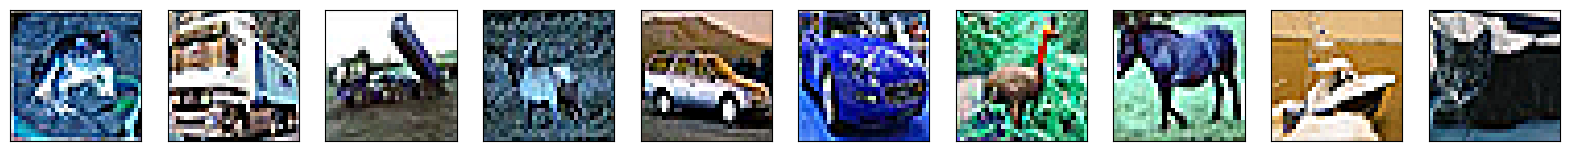

In [28]:
from numpy import random
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# orginal size -> 250 x 250

(x_train, _), (_, _) = cifar10.load_data()
ng_files = open('ng_data.txt', 'w')

# 何個表示するか
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    
    # conver to PIL Image
    #img = Image.fromarray(x_train[i])
    img    = cv2.cvtColor(x_train[i], cv2.COLOR_RGB2BGR)
    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]], np.float32)
    #kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]], np.float32) 
    res    = cv2.filter2D(img, -1, kernel)
    p2     = cv2.Laplacian(res, cv2.CV_64F).var()
    #s      = "ボケの程度は「%f」から「%f」になり、シャープになったと言える" % (p,p2)
    #print(s)
    img = cv2.resize(res, (250, 250),fx=0,fy=0,interpolation=cv2.INTER_LINEAR)
    f_name = 'ng_images/ngimage_' + str(i) + '.jpg'
    cv2.imwrite(f_name, img)
    ng_files.write(f_name + '\n')
    
    plt.imshow(res)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
ng_files.close()


In [ ]:
x = 5/4
print(int(x))
x = float(5)
print(x)

